In [23]:
import cv2
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pathlib import Path

import pathlib
import pandas as pd

from XRayDataset import XRayDataset

In [5]:
pwd()

'/home/lisettesolis/30254-pneumoniacs/predict-pneumonia'

In [6]:
# using cv2
# read in the image

img = cv2.imread("data/test/PNEUMONIA/person1_virus_11.jpeg", cv2.IMREAD_UNCHANGED)
print(img.shape)
print(type(img.shape))

(560, 872)
<class 'tuple'>


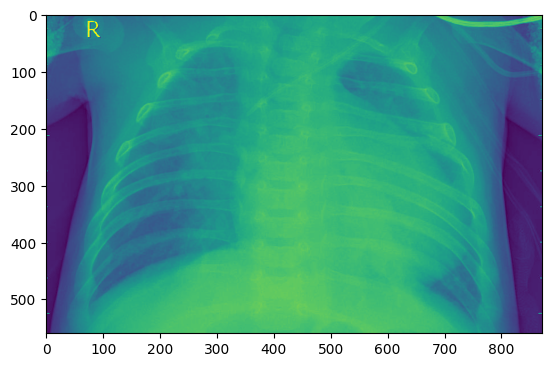

In [7]:
plt.imshow(img)

(1495, 1854, 3)
NORMAL
<class 'numpy.ndarray'>


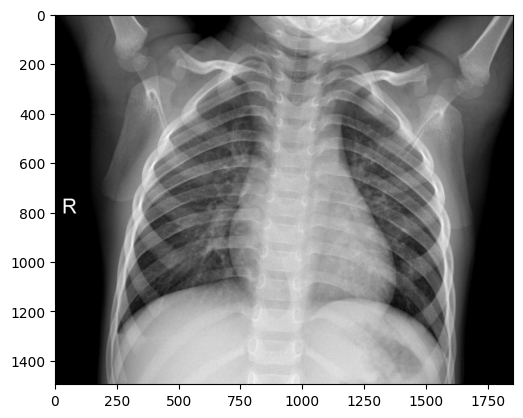

In [8]:
train_dataset = XRayDataset('data/csv_files/train.csv')
image, label = train_dataset.__getitem__(3)
print(image.shape)
print(label)
print(type(image))
plt.imshow(image)

In [9]:
[train_dataset.data['ratio'].mean()]*3

[0.7146625766871166, 0.7146625766871166, 0.7146625766871166]

In [10]:
train_dataset.data['ratio'].std()

0.11852999113579582

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-6.0294, -6.0294, -6.0294,  ..., -1.2651, -1.2651, -1.2651],
         [-6.0294, -6.0294, -6.0294,  ..., -1.2651, -1.2651, -1.2651],
         [-6.0294, -6.0294, -6.0294,  ..., -1.0666, -1.1659, -1.2651],
         ...,
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294],
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294],
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294]],

        [[-6.0294, -6.0294, -6.0294,  ..., -1.2651, -1.2651, -1.2651],
         [-6.0294, -6.0294, -6.0294,  ..., -1.2651, -1.2651, -1.2651],
         [-6.0294, -6.0294, -6.0294,  ..., -1.0666, -1.1659, -1.2651],
         ...,
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294],
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294],
         [-6.0294, -6.0294, -6.0294,  ..., -6.0294, -6.0294, -6.0294]],

        [[-6.0294, -6.0294, -6.0294,  ..., -1.2651, -1.2651, -1.2651],
         [-6.0294, -6.0294, -6.0294,  ..., -1

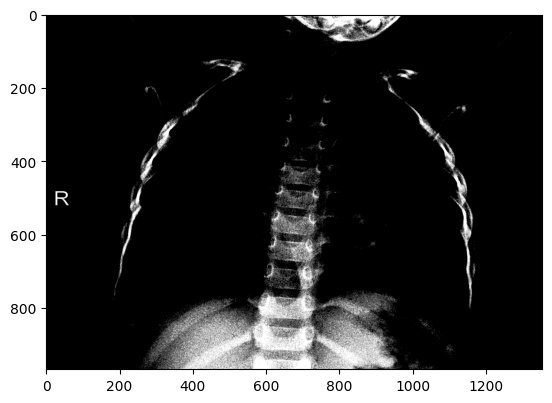

In [55]:
length = train_dataset.data['length'].mean()
ratio = train_dataset.data['ratio'].mean()

transform = T.Compose([
    T.ToPILImage(), # Convert numpy array to PIL Image
    T.RandomAdjustSharpness(sharpness_factor=2),
    T.RandomPosterize(bits=4, p=0.5),
    T.Resize((int(length), int(length/ratio))), # Resize the image
    T.ToTensor(), # Convert PIL Image to tensor
    T.Normalize(mean=[train_dataset.data['ratio'].mean()]*3, std=[train_dataset.data['ratio'].std()]*3) # Normalize the image
])

tensor = transform(image)
print(tensor)
tensor.shape

plt.imshow(tensor.permute(1, 2, 0))

In [25]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = image
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
T.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

AttributeError: module 'torchvision.transforms' has no attribute 'manual_seed'

In [12]:
transform = T.Compose([
    T.ToPILImage(), # Convert numpy array to PIL Image
        T.RandomAdjustSharpness(sharpness_factor=2),
        T.RandomPosterize(bits=4, p=0.5)
])

tensor = transform(image)
print(tensor)

<PIL.Image.Image image mode=RGB size=1854x1495 at 0x7FB24DC3D100>


In [ ]:
for i in range(0, len(train_dataset)):
    

range(0, 5216)